In [44]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('processedWithHeader.cleveland.data')
df.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  goal  
0    3.0  0.0  6.0     0  
1    2.0  3.0  3.0     2  
2    2.0  2.0  7.0     1  
3    3.0  0.0  3.0     0  
4    1.0  0.0  3.0     0

In [45]:
df.shape

(303, 14)

#This implies we have only 1 feature variable for the entire dataset.


In [46]:
missing_data = df.isna().sum()
print(missing_data)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
goal        0
dtype: int64


# Interpreting that we no missing values and hence can proceed with our dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  goal      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## Since there are only 2 column with 'object' datatype, assuming that there are strings contained in the object dtypes.

In [48]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope        goal  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003    0.469794    1.161075    0.616226    1.228536  
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000  
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000  
75%      2.000000  166.000000    1.000000    1.600000    2.000000    2.000000  
max      2.000000  202.000000    1.000000    6.200000    3.000000    4.000000

<AxesSubplot:xlabel='goal', ylabel='age'>

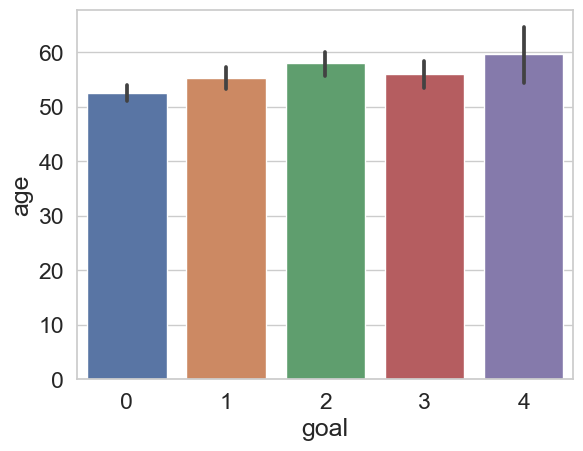

In [49]:
import seaborn as sns
sns.barplot(data=df, x="goal", y="age")

Thereby considering that there is some correlation between "Age" and "Goal", as we see most of the people lie within the age group of 50-60.


# Removing Outliers


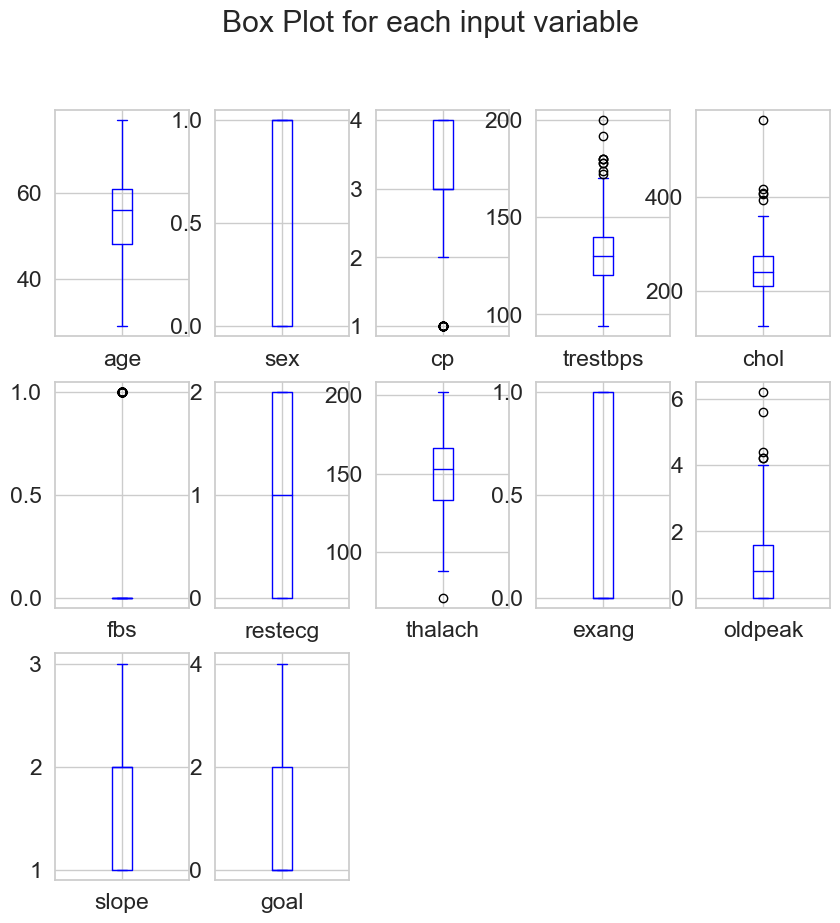

In [50]:
df.plot(kind='box', subplots=True, layout=(3,5),
sharex=False,sharey=False, figsize=(10, 10), title='Box Plot for each input variable',color='blue');

# Taking interpolation method to remove outliers as seen in thalach, oldpeak,chol,cp, etc

In [51]:
import numpy as np
Q1 = np.percentile(df['cp'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['cp'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

3.0
4.0
1.0


In [52]:
upper = df['cp'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['cp'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: cp, Length: 303, dtype: bool
(array([], dtype=int64),)
Lower bound: 0       True
1      False
2      False
3      False
4      False
       ...  
298     True
299    False
300    False
301    False
302    False
Name: cp, Length: 303, dtype: bool
(array([  0,  20,  21,  27,  30,  41,  59, 101, 112, 124, 141, 150, 182,
       183, 196, 199, 211, 215, 243, 262, 274, 275, 298], dtype=int64),)


The list is an array representing the outliers of the "cp" variable.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'goal'}>]], dtype=object)

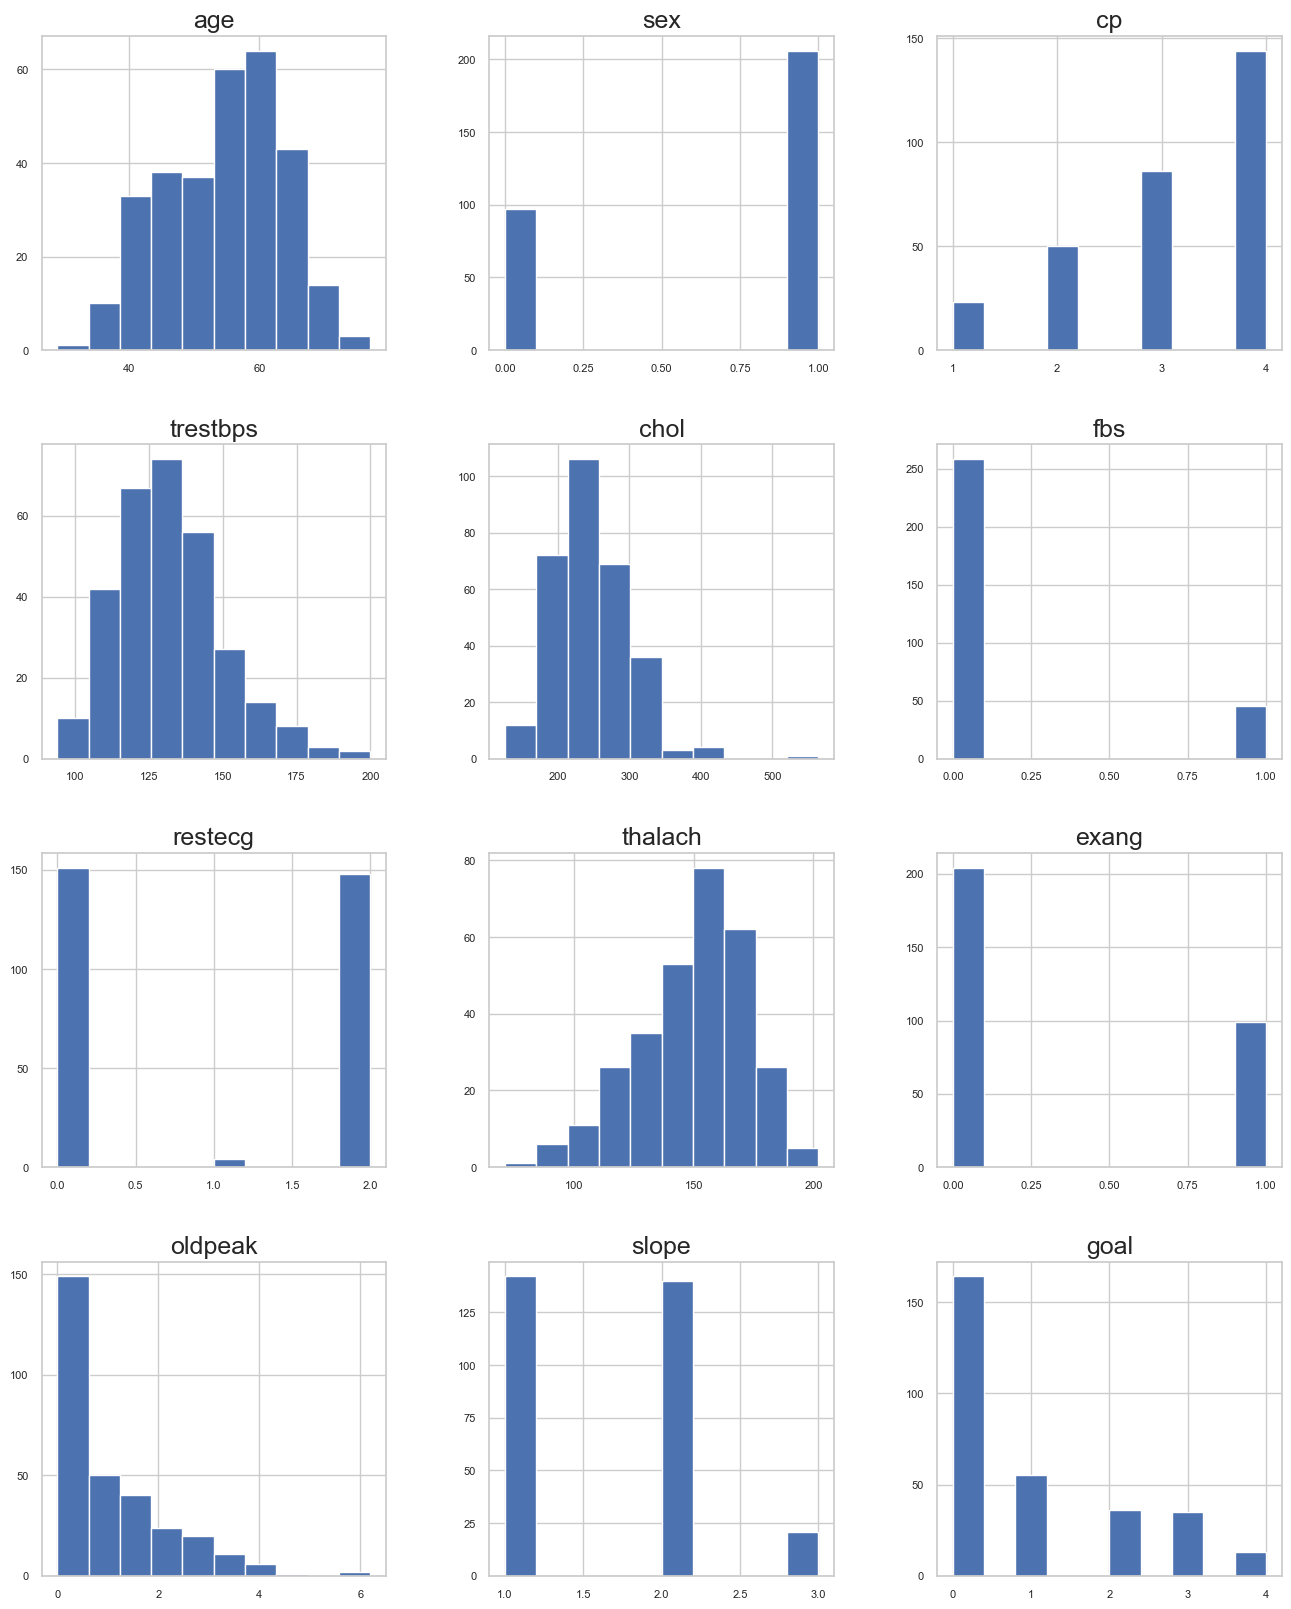

In [53]:
df.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

# We have normal distribution {histogram}  for age, trestbps and  chol
# thalac is right-skewed & oldpeak is left-skewed
->Also we can infer that females have less heart disease than males


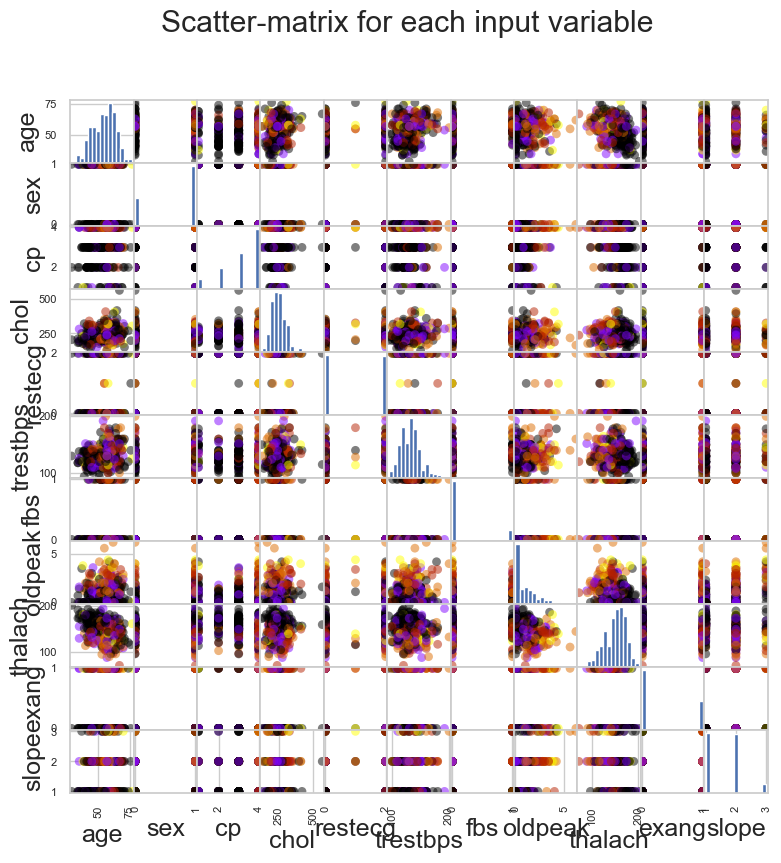

In [54]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['age', 'sex', 'cp','chol','restecg', 'trestbps','fbs','oldpeak','thalach','exang','slope','ca']
X = df[feature_names]
y = df['goal']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('goal_scatter_matrix')


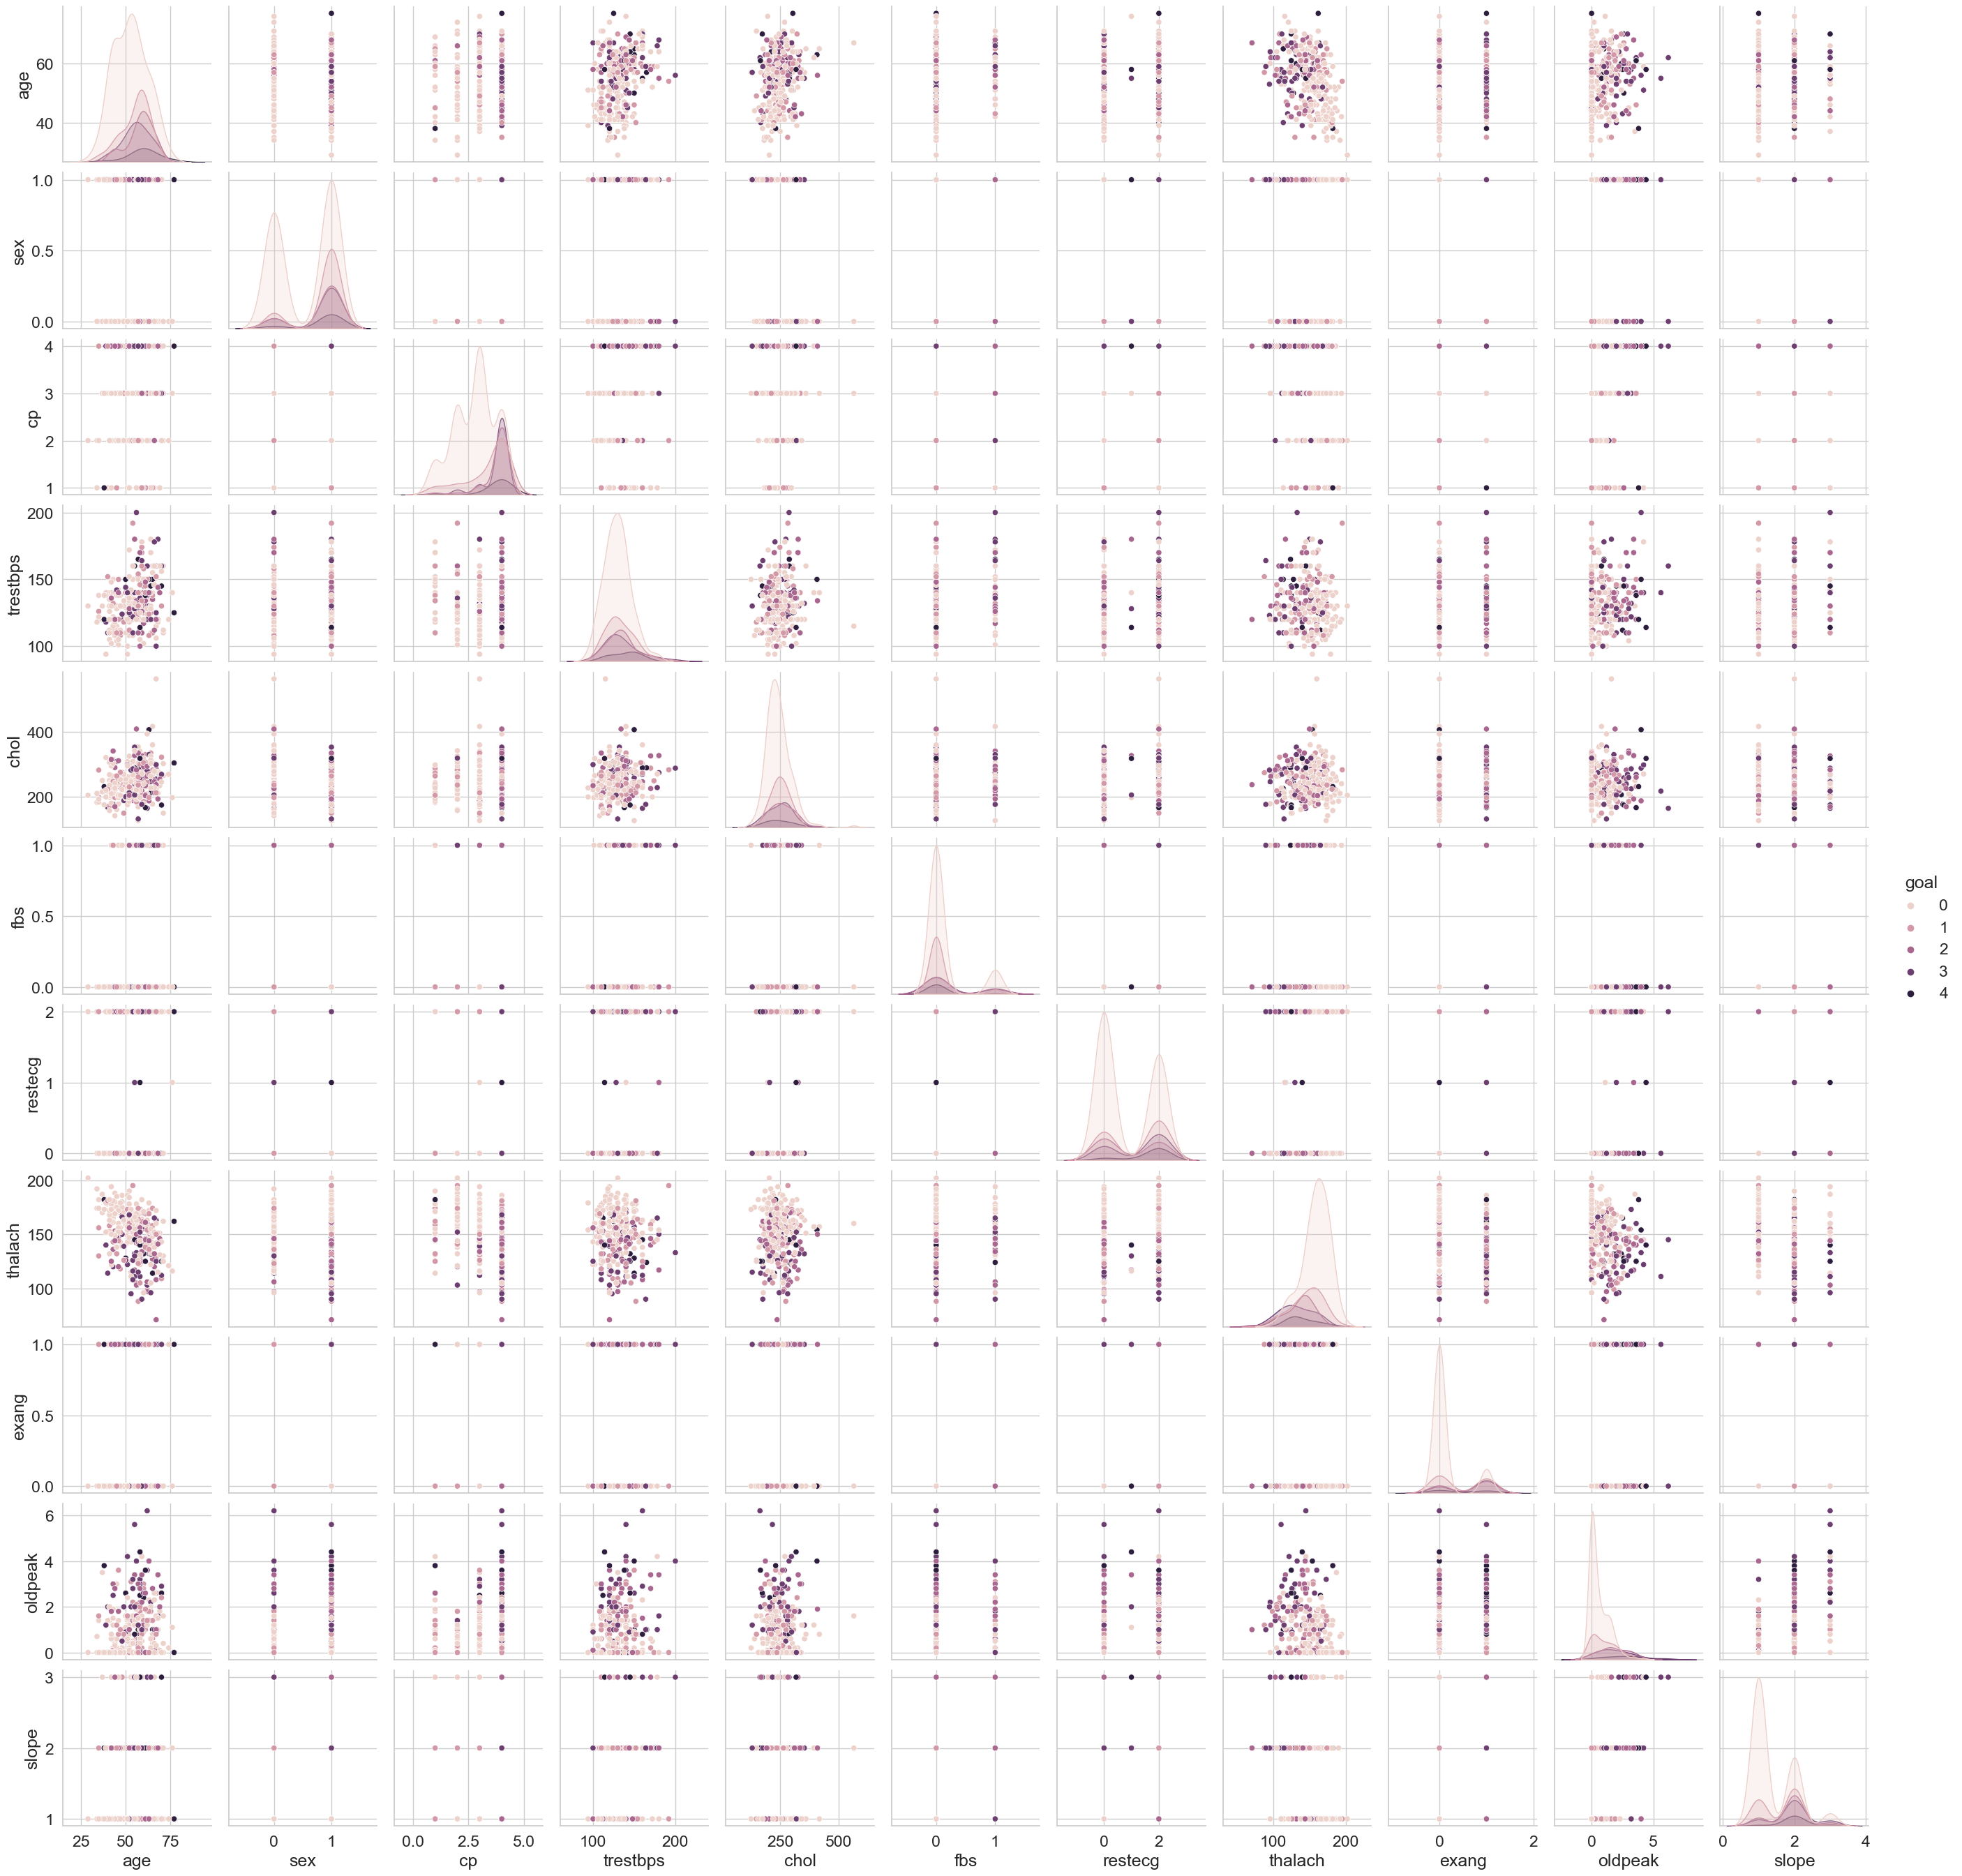

In [55]:
import seaborn as sns
sns.pairplot(df, hue='goal')

C:\Users\harsh\AppData\Local\Temp\ipykernel_5780\348628958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


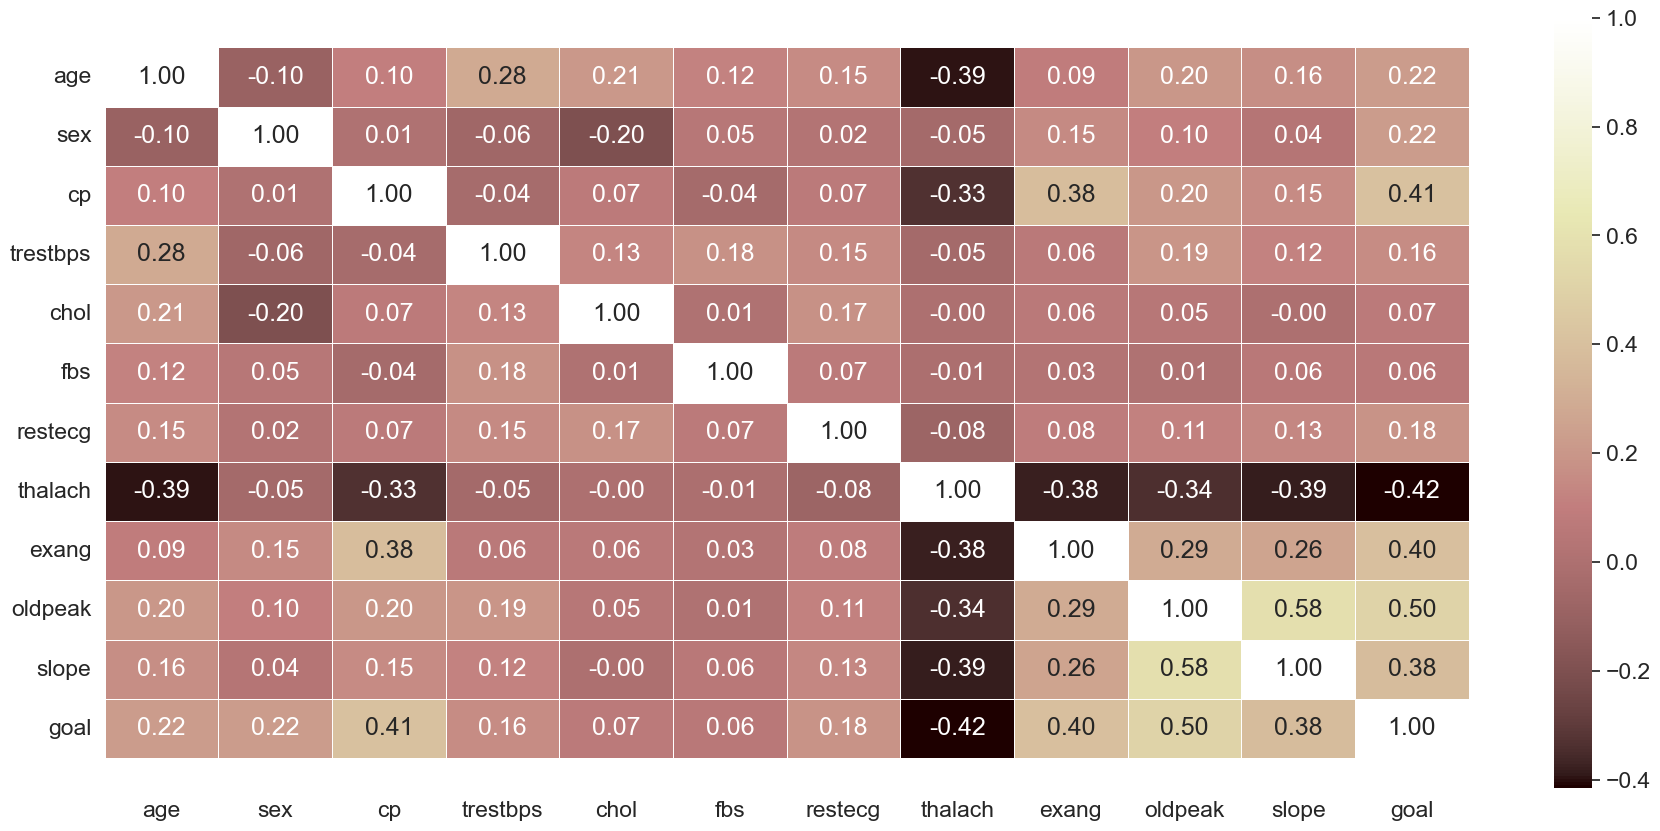

In [56]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="pink");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [57]:
df_new=df.replace(['?'],0)
df_new

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  goal  
0      3.0  0.0  6.0     0  
1      2.0  3.0  3.0     2  
2      2.0  2.0  7.0     1  
3      3.0  0.0  3.0     0  
4      1.0  0.0  3.0     0  
..     ...  ...  ...   ...  
298    2.0  0.0  7.0     1  
299    2.0  2.0  7.0     2  
300    2.0  1.0  7.0     3  
301    2.0  1.0  3.0     1  
302    1.0    0  3.0     0  

[303 rows x 14 columns]

In [58]:
df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  goal  
0      3.0  0.0  6.0     0  
1      2.0  3.0  3.0     2  
2      2.0  2.0  7.0     1  
3      3.0  0.0  3.0     0  
4      1.0  0.0  3.0     0  
..     ...  ...  ...   ...  
298    2.0  0.0  7.0     1  
299    2.0  2.0  7.0     2  
300    2.0  1.0  7.0     3  
301    2.0  1.0  3.0     1  
302    1.0    ?  3.0     0  

[303 rows x 14 columns]

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [60]:
X = df_new.drop("goal", axis=1)

# Target variable
y = df_new["goal"]
X

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  
0      3.0  0.0  6.0  
1      2.0  3.0  3.0  
2      2.0  2.0  7.0  
3      3.0  0.0  3.0  
4      1.0  0.0  3.0  
..     ...  ...  ...  
298    2.0  0.0  7.0  
299    2.0  2.0  7.0  
300    2.0  1.0  7.0  
301    2.0  1.0  3.0  
302    1.0    0  3.0  

[303 rows x 13 columns]

In [61]:
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: goal, Length: 303, dtype: int64

In [62]:
#Splitting our data in train and test
np.random.seed(40)
X_train, X_test, y_train, y_test = train_test_split(
    X,  #independent variables
    y,  # dependent variable
    test_size=0.2) 

In [63]:
np.array(y_train), len(y_train) #training dataset

(array([1, 3, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0,
        0, 1, 3, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0,
        2, 0, 1, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 2, 3, 0, 0, 3, 1, 0, 3, 0,
        0, 0, 3, 0, 0, 1, 2, 0, 2, 0, 1, 0, 4, 3, 0, 0, 0, 0, 4, 2, 1, 0,
        4, 0, 0, 2, 3, 0, 0, 3, 2, 0, 0, 1, 1, 0, 3, 3, 3, 3, 0, 1, 0, 0,
        0, 0, 0, 0, 3, 2, 0, 0, 4, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 1, 1, 4, 1, 1, 0, 1, 0, 4, 1, 0, 2, 0, 0, 0, 0,
        1, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 3, 1, 3, 3, 0, 0,
        0, 1, 3, 4, 2, 0, 0, 0, 0, 2, 2, 0, 3, 3, 3, 0, 1, 0, 0, 2, 4, 4,
        1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 3, 1, 3, 2, 2, 2, 1, 1, 3, 1, 0, 0, 2, 1, 2, 0, 0, 0],
       dtype=int64),
 242)

In [64]:
np.array(y_test), len(y_test) #test dataset

(array([0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 2, 3, 1, 3, 0, 0, 1, 0, 1, 0, 2, 1,
        3, 0, 4, 0, 2, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1,
        0, 0, 0, 3, 0, 4, 0, 3, 2, 0, 0, 1, 0, 4, 0, 0, 0], dtype=int64),
 61)

from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(X,y,test_size=0.2,random_state=42)

from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(128,128),max_iter=300)
model.fit(xtrain,ytrain)

# Logistic classification

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic regression classifier on training set: 0.62
Accuracy of Logistic regression classifier on test set: 0.62
[[34  1  0  0  0]
 [ 4  2  2  1  0]
 [ 1  1  0  5  0]
 [ 1  2  1  2  0]
 [ 0  1  2  1  0]]
[0.97142857 0.22222222 0.         0.33333333 0.        ]
0.31
[0.76923077 0.90384615 0.90740741 0.87272727 1.        ]
0.89
[0.8852459  0.80327869 0.80327869 0.81967213 0.93442623]
0.85


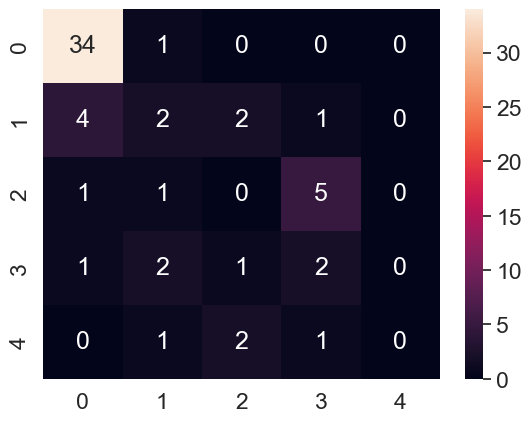

In [65]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_lr = logreg.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

cf = confusion_matrix(y_test, Y_pred_lr)
print(cf)
sns.heatmap(cf, annot=True)

#computing metrics 
FP = cf.sum(axis=0) - np.diag(cf) 
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR_lr = TP/(TP+FN)
TPR_logistic = round(sum(TPR_lr) / len(TPR_lr), 2)
print(TPR_lr)
print(TPR_logistic)

## Specificity or true negative rate
TNR_lr = TN/(TN+FP) 
TNR_logistic = round(sum(TNR_lr) / len(TNR_lr), 2)
print(TNR_lr)
print(TNR_logistic)

#Overall Accuracy
ACC_lr = (TP+TN)/(TP+FP+FN+TN)
ACC_logistic = round(sum(ACC_lr) / len(ACC_lr), 2)
print(ACC_lr)
print(ACC_logistic)

# KNN classification

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy of K-NN classifier on training set: 0.59
Accuracy of K-NN classifier on test set: 0.54
[[32  1  0  2  0]
 [ 7  1  1  0  0]
 [ 6  0  0  1  0]
 [ 3  2  1  0  0]
 [ 1  1  1  1  0]]
[0.91428571 0.11111111 0.         0.         0.        ]
0.21
[0.34615385 0.92307692 0.94444444 0.92727273 1.        ]
0.83
[0.67213115 0.80327869 0.83606557 0.83606557 0.93442623]
0.82


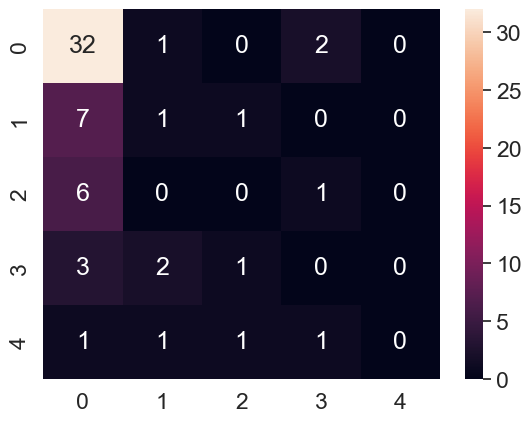

In [66]:
#2. KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

cf = confusion_matrix(y_test, Y_pred_knn)
print(cf)
sns.heatmap(cf, annot=True)

#computing metrics 
FP = cf.sum(axis=0) - np.diag(cf) 
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR_knn = TP/(TP+FN)
print(TPR_knn)
TPR_KNN = round(sum(TPR_knn) / len(TPR_knn), 2)
print(TPR_KNN)

## Specificity or true negative rate
TNR_knn = TN/(TN+FP) 
print(TNR_knn)
TNR_KNN = round(sum(TNR_knn) / len(TNR_knn), 2)
print(TNR_KNN)

#Overall Accuracy
ACC_knn= (TP+TN)/(TP+FP+FN+TN)
print(ACC_knn)
ACC_KNN = round(sum(ACC_knn) / len(ACC_knn), 2)
print(ACC_KNN)

# Decision Tree classification

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.49
[[24  8  1  1  1]
 [ 5  1  2  1  0]
 [ 0  1  3  2  1]
 [ 0  1  1  2  2]
 [ 1  1  1  1  0]]
[0.68571429 0.11111111 0.42857143 0.33333333 0.        ]
0.31
[0.76923077 0.78846154 0.90740741 0.90909091 0.92982456]
0.86
[0.72131148 0.68852459 0.85245902 0.85245902 0.86885246]
0.8


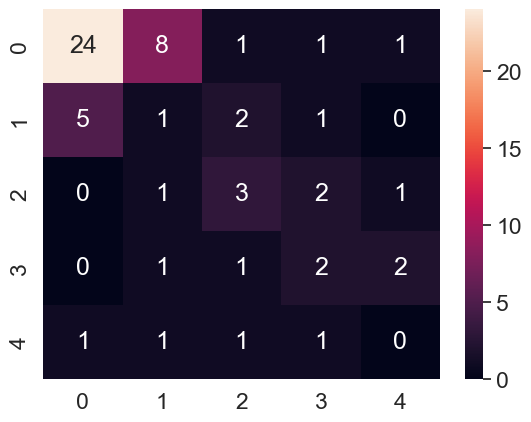

In [67]:
#3. Decision Tree Classifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
Y_pred_DT = clf.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

cf = confusion_matrix(y_test, Y_pred_DT)
print(cf)
sns.heatmap(cf, annot=True)

#computing metrics 
FP = cf.sum(axis=0) - np.diag(cf) 
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR_dt = TP/(TP+FN)
print(TPR_dt)
TPR_DT = round(sum(TPR_dt) / len(TPR_dt), 2)
print(TPR_DT)

## Specificity or true negative rate
TNR_dt = TN/(TN+FP) 
print(TNR_dt)
TNR_DT = round(sum(TNR_dt) / len(TNR_dt), 2)
print(TNR_DT)

#Overall Accuracy
ACC_dt = (TP+TN)/(TP+FP+FN+TN)
print(ACC_dt)
ACC_DT = round(sum(ACC_dt) / len(ACC_dt), 2)
print(ACC_DT)

# Visual Comparison of classifiers with regard to Accuracy, Specificity and Sensitivity

In [68]:
Accuracy = []
Accuracy.extend((ACC_logistic, ACC_KNN, ACC_DT))

Sensitivity = []
Sensitivity.extend((TPR_logistic, TPR_KNN, TPR_DT))

Specificity = []
Specificity.extend((TNR_logistic, TNR_KNN, TNR_DT))

metric_logistic = []
metric_logistic.extend((Accuracy[0], Sensitivity[0], Specificity[0]))

metric_knn = []
metric_knn.extend((Accuracy[1], Sensitivity[1], Specificity[1]))

metric_dt = []
metric_dt.extend((Accuracy[2], Sensitivity[2], Specificity[2]))

In [69]:
data = {'Metrics': ['Accuracy', 'Sensitivity', 'Specifity'],
                'Logistic': metric_logistic,
                'KNN': metric_knn,
                'DT': metric_dt}
df = pd.DataFrame(data, columns = ['Metrics', 'Logistic', 'KNN', 'DT'])

df.head()

Metrics  Logistic   KNN    DT
0     Accuracy      0.85  0.82  0.80
1  Sensitivity      0.31  0.21  0.31
2    Specifity      0.89  0.83  0.86

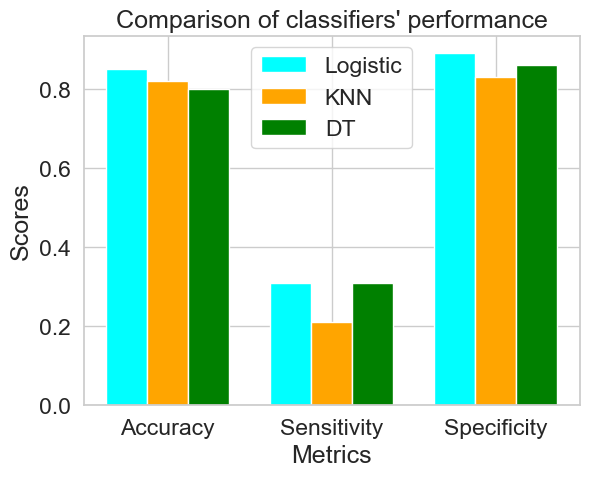

In [70]:
labels = ['Accuracy', 'Sensitivity', 'Specificity']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

plt.subplot()

plt.bar(x-0.25, df['Logistic'], width, color='cyan')
plt.bar(x, df['KNN'], width, color='orange')
plt.bar(x+0.25, df['DT'], width, color='green')
plt.xticks(x, labels)
plt.title('Comparison of classifiers\' performance')
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.legend(["Logistic", "KNN", "DT"])
plt.show()


# Heart Disease vs No heart disease

In [71]:
df= pd.read_csv('processedWithHeader.cleveland.data')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'goal']
df['goal'] = df.goal.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [72]:
df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  goal  
0      3.0  0.0  6.0     0  
1      2.0  3.0  3.0     1  
2      2.0  2.0  7.0     1  
3      3.0  0.0  3.0     0  
4      1.0  0.0  3.0     0  
..     ...  ...  ...   ...  
298    2.0  0.0  7.0     1  
299    2.0  2.0  7.0     1  
300    2.0  1.0  7.0     1  
301    2.0  1.0  3.0     1  
302    1.0    ?  3.0     0  

[303 rows x 14 columns]

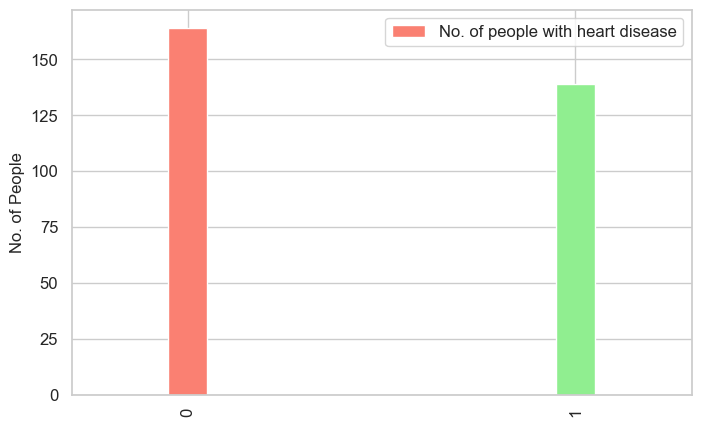

In [73]:
df.goal.value_counts().plot(kind="bar",width=0.1,color=["salmon","lightgreen"],legend=1,figsize=(8,5))
plt.ylabel("No. of People", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["No. of people with heart disease"],fontsize=12);
plt.show()

In [74]:
y = df["goal"]
X = df.drop('goal',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [75]:
df_hd=df.replace(['?'],0)
df_hd

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  goal  
0      3.0  0.0  6.0     0  
1      2.0  3.0  3.0     1  
2      2.0  2.0  7.0     1  
3      3.0  0.0  3.0     0  
4      1.0  0.0  3.0     0  
..     ...  ...  ...   ...  
298    2.0  0.0  7.0     1  
299    2.0  2.0  7.0     1  
300    2.0  1.0  7.0     1  
301    2.0  1.0  3.0     1  
302    1.0    0  3.0     0  

[303 rows x 14 columns]

In [76]:
y = df_hd["goal"]
X = df_hd.drop('goal',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [77]:
from sklearn.metrics import plot_confusion_matrix
sns.set(font_scale=1.5)

In [78]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))


confussion matrix
[[32  3]
 [ 9 17]]


Accuracy of Logistic Regression: 80.32786885245902 

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.85      0.65      0.74        26

    accuracy                           0.80        61
   macro avg       0.82      0.78      0.79        61
weighted avg       0.81      0.80      0.80        61



C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


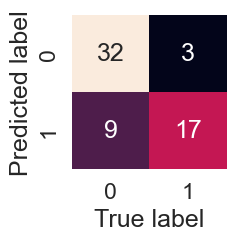

In [79]:
def plot_confusion_matrix(y_test, lr_predict):
    """
    Heatmap for better visualisation
    """
    fig, ax = plt.subplots(figsize=(2, 2))
    ax = sns.heatmap(confusion_matrix(y_test, lr_predict),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_confusion_matrix(y_test,lr_predict)

In [80]:
m2 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[28  7]
 [13 13]]


Accuracy of K-NeighborsClassifier: 67.21311475409836 

              precision    recall  f1-score   support

           0       0.68      0.80      0.74        35
           1       0.65      0.50      0.57        26

    accuracy                           0.67        61
   macro avg       0.67      0.65      0.65        61
weighted avg       0.67      0.67      0.66        61



C:\Users\harsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


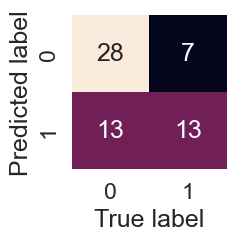

In [81]:
def plot_confusion_matrix(y_test, knn_predicted):
    """
    Heatmap for better visualisation
    """
    fig, ax = plt.subplots(figsize=(2, 2))
    ax = sns.heatmap(confusion_matrix(y_test, knn_predicted),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_confusion_matrix(y_test,knn_predicted)

In [82]:
from sklearn.tree import DecisionTreeClassifier
m3 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confusion matrix
[[27  8]
 [12 14]]


Accuracy of DecisionTreeClassifier: 67.21311475409836 

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        35
           1       0.64      0.54      0.58        26

    accuracy                           0.67        61
   macro avg       0.66      0.65      0.66        61
weighted avg       0.67      0.67      0.67        61



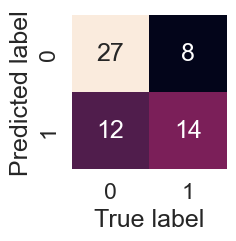

In [83]:
def plot_confusion_matrix(y_test, dt_predicted):
    """
    Heatmap for better visualisation
    """
    fig, ax = plt.subplots(figsize=(2, 2))
    ax = sns.heatmap(confusion_matrix(y_test, dt_predicted),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_confusion_matrix(y_test,dt_predicted)

#The confusion matrix is a N x N matrix, where N is the number of classes or outputs. For our initial dataset , we had the feature of "Goal" with 5 classes namely {0,1,2,3,4}. Therefore our confusion matrix was (5,5)

#When we classified our dataset with the label "Heart Disease vs No Heart Disease" we encoded our "Goal" with 2 classes with binary values {0,1}. Thus, making this a confusion matrix of (2,2)

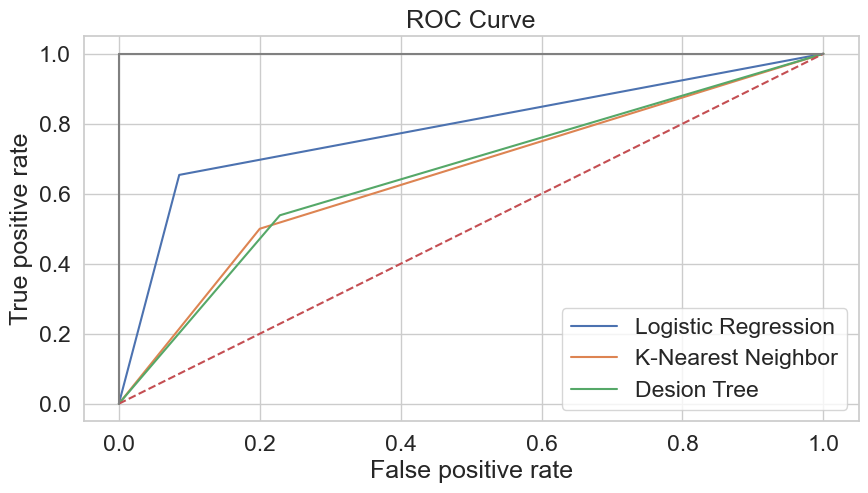

In [84]:
from sklearn.metrics import roc_curve

lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('ROC Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

Thus, we see that Logistic Regression Classifier is the best choice with Accuracy = 0.82